# Iris Database 

In [54]:
import pandas as pd
from scipy.spatial.distance import mahalanobis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
nombres = ['largo_sepalo', 'ancho_sepalo', 'largo_petalo', 'ancho_petalo', 'clase']
dataset = pd.read_csv(url, names=nombres)

print(dataset.head())
print(dataset.shape)
dataset.describe()


   largo_sepalo  ancho_sepalo  largo_petalo  ancho_petalo        clase
0           5.1           3.5           1.4           0.2  Iris-setosa
1           4.9           3.0           1.4           0.2  Iris-setosa
2           4.7           3.2           1.3           0.2  Iris-setosa
3           4.6           3.1           1.5           0.2  Iris-setosa
4           5.0           3.6           1.4           0.2  Iris-setosa
(150, 5)


,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split dataset into training and test set
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train and test classification model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_lda, y_train)
y_pred = classifier.predict(X_test_lda)
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.9777777777777777


In [46]:
# Calculate Mahalanobis distance for every feature
covariance_matrix = dataset.iloc[:, :-1].cov().values
inv_covariance_matrix = np.linalg.inv(covariance_matrix)
mean = dataset.iloc[:, :-1].mean().values
distances = []
for i in range(len(dataset)):
    x = dataset.iloc[i, :-1].values
    distance = mahalanobis(x, mean, inv_covariance_matrix)
    distances.append(distance)

# Identify outliers 
threshold = np.mean(distances) + 2*np.std(distances)
outliers = dataset[distances > threshold]
print('Número de valores atípicos:', len(outliers))
print(outliers)


Número de valores atípicos: 7
     largo_sepalo  ancho_sepalo  largo_petalo  ancho_petalo           clase
41            4.5           2.3           1.3           0.3     Iris-setosa
106           4.9           2.5           4.5           1.7  Iris-virginica
114           5.8           2.8           5.1           2.4  Iris-virginica
117           7.7           3.8           6.7           2.2  Iris-virginica
131           7.9           3.8           6.4           2.0  Iris-virginica
134           6.1           2.6           5.6           1.4  Iris-virginica
141           6.9           3.1           5.1           2.3  Iris-virginica


In [52]:
# Select columns de largo_petal y ancho_petal
petal_data = dataset[['largo_petalo', 'ancho_petalo']]

# calculate covariance matrix and its inverse
cov_matrix = np.cov(petal_data.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calculate mahalanois distance por each observation
mahal_distance = []
for i in range(len(petal_data)):
    diff = petal_data.iloc[i] - petal_data.mean()
    dist = np.sqrt(diff @ inv_cov_matrix @ diff.T)
    mahal_distance.append(dist)

# Calculate thresholds to identify mahalanobis distance
threshold = np.mean(mahal_distance) + (2 * np.std(mahal_distance))

# Create dataframe with outliers
petal_outliers = dataset[mahal_distance > threshold]

# Outliers
print(f"Número de valores atípicos detectados: {len(petal_outliers)}")
print(petal_outliers)


Número de valores atípicos detectados: 7
     largo_sepalo  ancho_sepalo  largo_petalo  ancho_petalo           clase
107           7.3           2.9           6.3           1.8  Iris-virginica
114           5.8           2.8           5.1           2.4  Iris-virginica
122           7.7           2.8           6.7           2.0  Iris-virginica
134           6.1           2.6           5.6           1.4  Iris-virginica
141           6.9           3.1           5.1           2.3  Iris-virginica
144           6.7           3.3           5.7           2.5  Iris-virginica
145           6.7           3.0           5.2           2.3  Iris-virginica


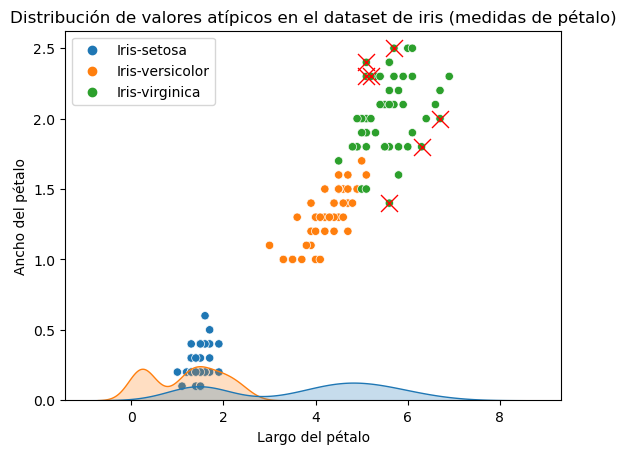

In [53]:
# Scatter plot of the two columns of petal measurements of the dataset.
sns.scatterplot(data=dataset, x='largo_petalo', y='ancho_petalo', hue='clase')

# Contour plot with marked outliers
sns.kdeplot(dataset.loc[:, ['largo_petalo', 'ancho_petalo']], fill=True, color='b')
sns.scatterplot(data=petal_outliers, x='largo_petalo', y='ancho_petalo', color='r', marker='x', s=150)

# Title and axis
plt.title('Distribución de valores atípicos en el dataset de iris (medidas de pétalo)')
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')

plt.show()


In [49]:
# Select columns largo_sepalo and ancho_sepalo
sepal_data = dataset[['largo_sepalo', 'ancho_sepalo']]

# Calculate the covariance matrix and its inverse
cov_matrix = np.cov(sepal_data.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calculate the Mahalanobis distance for each observation.
mahal_distance = []
for i in range(len(sepal_data)):
    diff = sepal_data.iloc[i] - sepal_data.mean()
    dist = np.sqrt(diff @ inv_cov_matrix @ diff.T)
    mahal_distance.append(dist)

# Calculate the limits to identify outliers
threshold = np.mean(mahal_distance) + (2 * np.std(mahal_distance))

# Create dataframe with outliers
sepal_outliers = dataset[mahal_distance > threshold]

# Title and axis
print(f"Número de valores atípicos detectados: {len(sepal_outliers)}")
print(sepal_outliers)


Número de valores atípicos detectados: 6
     largo_sepalo  ancho_sepalo  largo_petalo  ancho_petalo            clase
15            5.7           4.4           1.5           0.4      Iris-setosa
33            5.5           4.2           1.4           0.2      Iris-setosa
41            4.5           2.3           1.3           0.3      Iris-setosa
60            5.0           2.0           3.5           1.0  Iris-versicolor
117           7.7           3.8           6.7           2.2   Iris-virginica
131           7.9           3.8           6.4           2.0   Iris-virginica


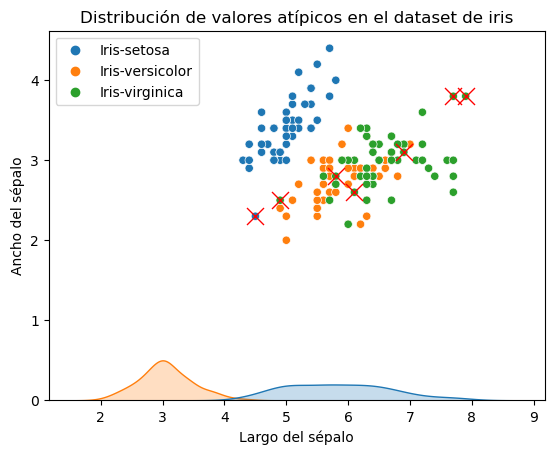

In [50]:
# Scatter plot of the first two columns of the dataset
sns.scatterplot(data=dataset, x='largo_sepalo', y='ancho_sepalo', hue='clase')

# Contour plot with marked outliers
sns.kdeplot(dataset.loc[:, ['largo_sepalo', 'ancho_sepalo']], fill=True, color='b')
sns.scatterplot(data=outliers, x='largo_sepalo', y='ancho_sepalo', color='r', marker='x', s=150)

# Title and axis
plt.title('Distribución de valores atípicos en el dataset de iris')
plt.xlabel('Largo del sépalo')
plt.ylabel('Ancho del sépalo')

plt.show()